# Part 1: SLR

Consider a Simple Linear Regression model of the form:

$$
y = \alpha + \beta x + \epsilon
$$

where:
- $y$ is the dependent variable,
- $x$ is the independent variable,
- $\epsilon$ is the error term
- $\alpha$ and $\beta$ are parameters to be estimated

Using your brain and a pen, prove that :

$\hat{\beta} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$

$\hat{\alpha} = \bar{y} - \hat{\beta} \bar{x}$

hint : start by $\hat{\alpha}$

# Part 2: MLR

Consider a Muliple Linear Regression model of the form:
$$
y = X \beta + \epsilon
$$

1. What is $\beta$ ?
2. What is $X$ ?
3. What are the dimensions of $X$ & $\beta$
4. Prove that $\hat{\beta} = (X^T X)^{-1} X^T y$
5. What are the dimensions of each element of $\hat{\beta}$
6. Under what conditions $X^T X$ is invertible ?

# Part 3 : Calculate Simple Linear Regression Coefficients

In [ ]:
#2. Draw the regression line on paper, and then plot it by coding. Compare

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 4, 7, 6])

beta_hat = 0.8
alpha_hat = 2.6

y_pred = alpha_hat + beta_hat * x

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="blue", label="Actual data")
plt.plot(x, y_pred, color="red", linewidth=2, label="Regression line")
plt.title("Simple linear regression")
plt.legend()
plt.show() 

In [ ]:
# 3. Calculate residuals
residuals = y - y_pred
print("Residuals:", residuals) 

In [ ]:
# 4. Calculate SSR
ssr = np.sum(residuals ** 2)
print("SSR:", ssr)

In [ ]:
# 5. Calculate SST
sst = np.sum((y - np.mean(y)) ** 2)
# Calculate R_squared
r_squared = 1 - (ssr / sst)
print("R_squared:", r_squared) 


Given the following dataset:
   \( x \) | \( y \) |
 |---------|---------|
 | 1       | 3       |
 | 2       | 5       |
 | 3       | 4       |
 | 4       | 7       |
 | 5       | 6       |

1. Calculate the intercept and slope for a Simple Linear Regression model.
2. Draw the regression line on paper, and then plot it by coding. Compare
4. Calculate the residuals on paper and then by coding. Compare
5. Calculate the SSR on paper and then by coding. Compare
6. Calculate the R_squared on paper and then by coding. Analyse


##### R_squared (Coefficient of Determination)

$R^2$, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It provides insight into the goodness of fit of a model, indicating how well the independent variables explain the variability of the dependent variable.

The $R^2$ value ranges from 0 to 1, where:
- $R^2 = 1$ indicates that the regression model perfectly fits the data.
- $R^2 = 0$ indicates that the model does not explain any of the variability of the response data around its mean.

$R^2$ is calculated using the formula:
$R^2 = 1 - \frac{\text{SSR}}{\text{SST}}$, 

where :
- SSR (Sum of Squared Residuals) is :
  $\text{SSR} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
- SST (Total Sum of Squares) is :
  $\text{SST} = \sum_{i=1}^{n} (y_i - \bar{y})^2$

## Part 4. Coding task: Regression to the California Housing dataset. 

The goal of this task is to predict house prices based on median income using a linear regression model.

### **Tasks:**
1) Divide the dataset into training and testing sets.
2) Fit a linear regression model using the training data.
3) Make predictions on the test data
4) Evaluate the model’s performance using appropriate metrics, such as Mean Squared Error (MSE) and R² score.
5) Plot the regression line on a scatter plot of the actual data to visually assess the model’s fit.
6) Plot the residuals distribution
7) Repeat those steps by using more features
$\hat{b}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [2]:
df["MedHouseVal"] = data.target
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [3]:
# Task 1.
X = df[["MedInc"]] 
y = df["MedHouseVal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [4]:
# Task 2.
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [5]:
# Task 3
y_pred = model.predict(X_test)


In [6]:
# Task 4
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.7091157771765548
R^2 Score: 0.45885918903846656


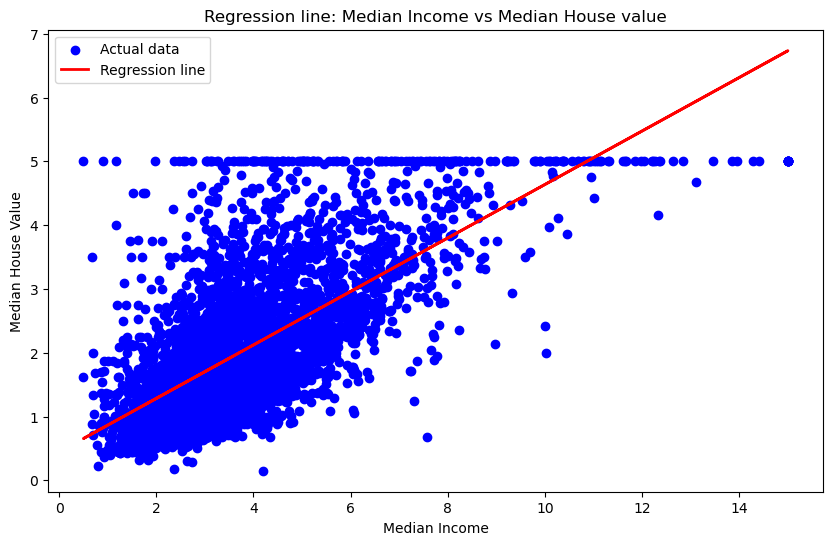

In [7]:
# Task 5
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="blue", label="Actual data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression line")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Regression line: Median Income vs Median House value")
plt.legend()
plt.show()


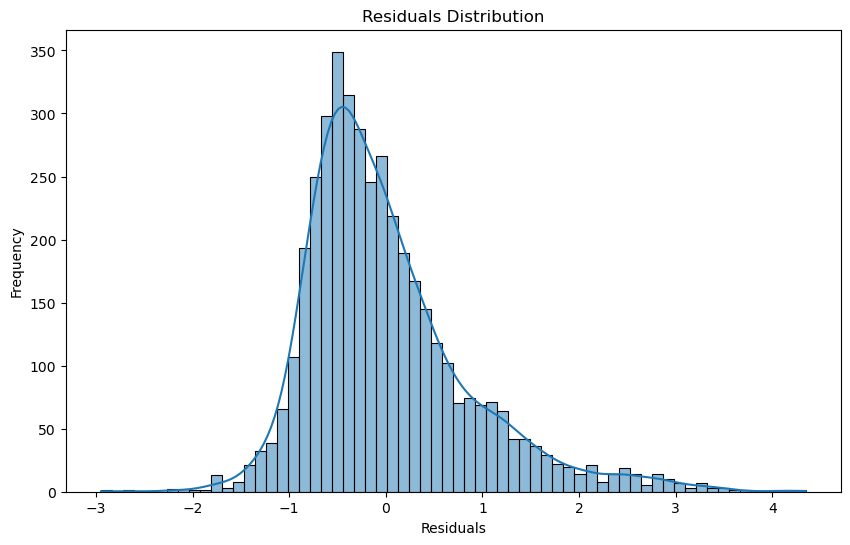

In [8]:
# Task 6
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show() 

Using more features - Mean Squared Error: 0.5558915986952442
Using more features - R^2 score: 0.575787706032451


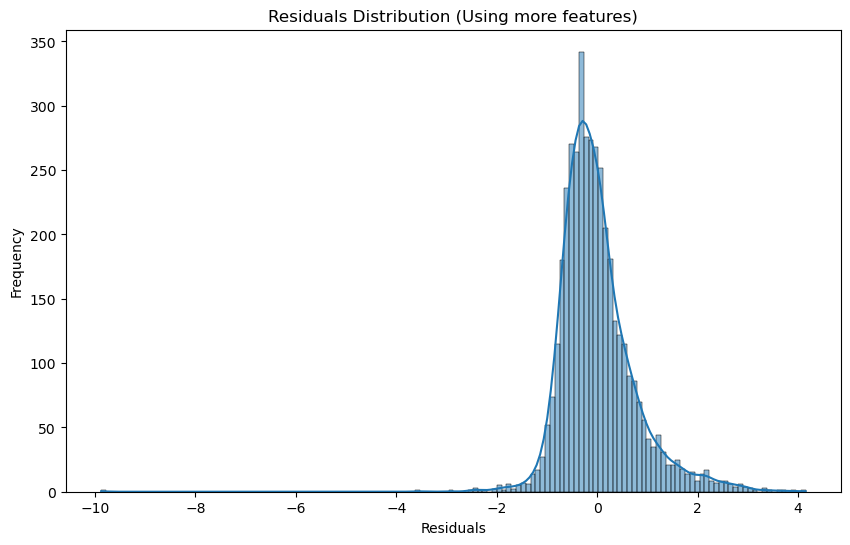

In [9]:
# Task 7
X = df.drop(columns="MedHouseVal")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Using more features - Mean Squared Error: {mse}")
print(f"Using more features - R^2 score: {r2}")

# Plot the residuals distribution for the model using more features
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution (Using more features)")
plt.show() 